In [2]:
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd
import random

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
    
#grafico de nodos
def graficar(archive):

    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()
    
    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])

In [6]:
def grafo (archive):
    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
    return g

#La V es de vulnerabilidad.
V_AP = grafo ('tc02Data/yeast_AP-MS.txt')
# V_LIT = grafo ('tc02Data/yeast_LIT.txt')
# V_Y2H = grafo ('tc02Data/yeast_Y2H.txt')
# V_LIT_REGULY = grafo ('tc02Data/yeast_LIT_Reguly.txt')

In [5]:
def asignar_esencialidad(g):  
    
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        for j in range(len(escen)):
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'

In [9]:
len(V_AP)
V_AP.number_of_nodes()

1622

In [18]:
def impacto_grado (g,largo_red): #largo_red=400
    x = []
    y = []
    #Tomo la componente gigante de mi grafo. Como criterio se toma el largo (key = len) y tomo el subgrafo con el máximo.
    comp_gig = max (nx.connected_component_subgraphs(g) , key = len)
    N = int (comp_gig.number_of_nodes())
    i = 0
    while len (comp_gig) > largo_red: #Modificando el numero podemos determinar hasta cuando va a analizar el largo de la red.
        nodos = [] #Nodos de la componente gigante.
        grados = [] #Grado de ellos.
        for node in  comp_gig.nodes:
            nodos.append (node)
            grados.append (comp_gig.degree(node))
        indice_nodo_grado_mayor = grados.index(max(grados))
        comp_gig.remove_node(nodos[indice_nodo_grado_mayor])
        i = i + 1
        x.append (i/float (N))
        comp_gig = max (nx.connected_component_subgraphs(comp_gig) , key = len)
        y.append(len(comp_gig)/float (N)) #IMPORTANTE:El numerador es el largo NUEVO de la componente gigante y
                                          #el denominador te da el largo antes de la extracción del nodo central.
        
    todo = [x,y]
    return todo

In [15]:
grado=impacto_grado(V_AP,10)

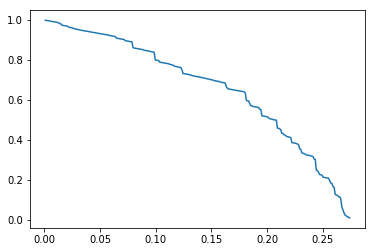

In [16]:
plt.plot(grado[0],grado[1])
plt.show()